# Class 3 - Unsupervised learning models

Unsupervised learning is area of machine learning focused on detecting patterns in the data and **modelling without explicitly set labels/target variable**. In contrast, supervised learning techniques are mainly based on predicting nominal features (classification) or continuous features (regression).

Main tasks in the area of unsupervised learning are:
- **dimensionality reduction**
- **clustering**
- anomaly detection

**Dimensionality reduction** algorithms aim to represent high-dimensional input data in the output space with lower dimensionality. The approach is useful for:
- visualization of high dimensional data
- removing noise
- lowering the volume of the dataset, hence improving performance of other algorithms
- obfuscating and anonymizing the data

**Clustering** aims to differentiate the groups within the data, usually based on the distance between the observations. It's common task for customer or product datasets - segments created based on clustering results may be used in marketing activities or as an input to supervised machine learning model.

In [5]:
pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import umap

## Dimensionality reduction

In [3]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
digits['images'][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

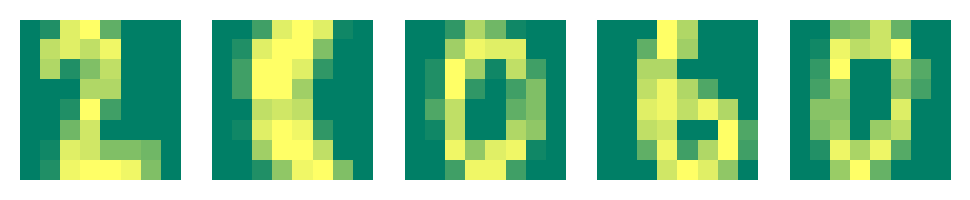

In [5]:
fig, ax_array = plt.subplots(1, 5)
fig.set_dpi(200)
axes = ax_array.flatten()
rand = random.sample(range(len(digits['images'])),5)
for i,ax in enumerate(axes):
    ax.imshow(digits.images[rand[i]], cmap='summer')
plt.setp(axes, xticks=[], yticks=[], frame_on=False);

In [7]:
#What is the dimensionality of the digits?
print(digits.data.shape)

(1797, 64)


We'll use PCA (Principal Components Analysis) technique to represent 64-dimensional digits data in 2-dimensional space and plot the result.

PCA is popular algorithm for dimensionality reduction based on linear algebra. For input matrix (dataset) we need to calculate eigenvectors (principal components) and eigenvalues. Eigenvectors determine directions for projection in new feature space and eigenvalues determine the mangnitude ('importance') of the vectors.
![PCA](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.09-PCA-rotation.png)
[source](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)

In [8]:
pca = PCA(2)  # PCA model reducing data to 2 dimensions (2 principal components)
pca_embedding = pca.fit_transform(digits.data)
print(pca_embedding.shape)

(1797, 2)


In [9]:
def plot_reduced_data(embedding, color_col):
    plt.figure(dpi=150)
    plt.scatter(embedding[:, 0], embedding[:, 1], c=color_col, cmap='rainbow', s=5)
    plt.gca().set_aspect('equal', 'datalim')
    n = len(np.unique(color_col))
    plt.colorbar(boundaries=np.arange(n+1)-0.5).set_ticks(np.arange(n)) 

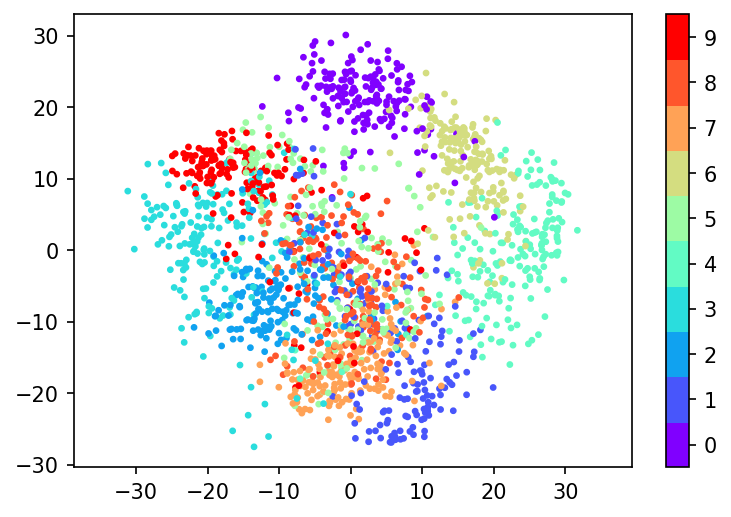

In [10]:
plot_reduced_data(pca_embedding, digits.target)

Now let's try a modern dimensionality reduction algorithm called **UMAP** (Uniform Manifold Approximation & Projection). It is rooted in Riemannian geometry - details can be found in the [paper](https://arxiv.org/abs/1802.03426). UMAP proved to give really good results and is considered state-of-the-art.

In [11]:
model = umap.UMAP(random_state=42)
model.fit(digits.data)
umap_embedding = model.transform(digits.data)
umap_embedding.shape

(1797, 2)

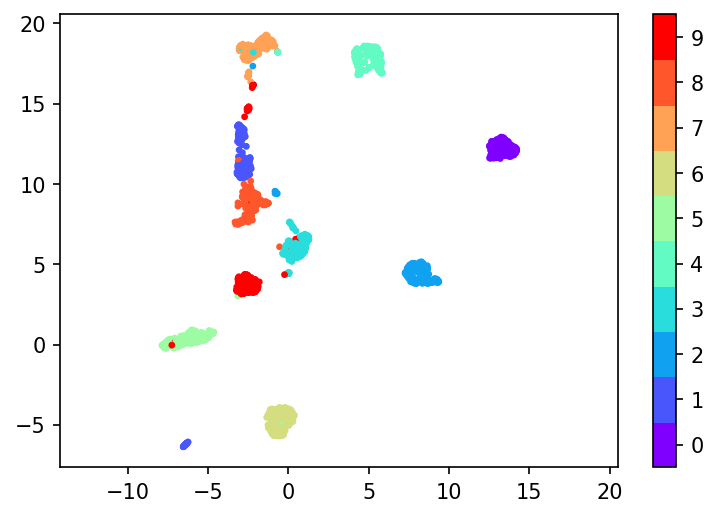

In [12]:
plot_reduced_data(umap_embedding, digits.target)

## Clustering

K-means algorithm in the nutshell:
1. Pick randomly 'k' observations from the dataset - initial centroids
2. Assign other observations to the nearest centroid
3. Calculate average coordinates from the members of the clusters - new coordinates of the center
4. Repeat 2. and 3. until stop criterion is reached

![kmeans](https://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_digits_001.png)
[source](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py)

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [14]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, names = ['sepal_length','sepal_width','petal_length','petal_width','species'])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [15]:
species = df.species
df = df.drop('species', axis = 1)

In [16]:
df = pd.DataFrame(StandardScaler().fit(df).transform(df))

In [17]:
df

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [18]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(df)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [19]:
model = umap.UMAP(random_state=42)
umap_embedding = model.fit(df).transform(df)

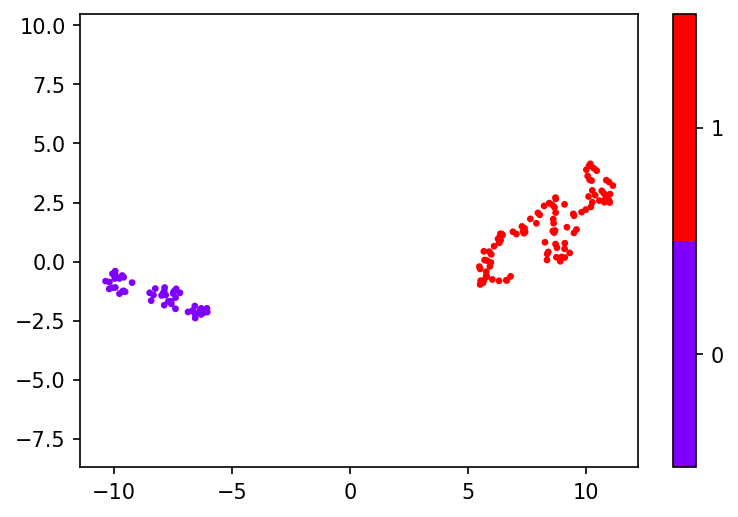

In [20]:
plot_reduced_data(umap_embedding, kmeans.labels_)

**Elbow** method to pick k - inertia for given k-means clustering is the sum of squares between clusters' center and their members

In [21]:
kmeans.inertia_

223.73200573676343

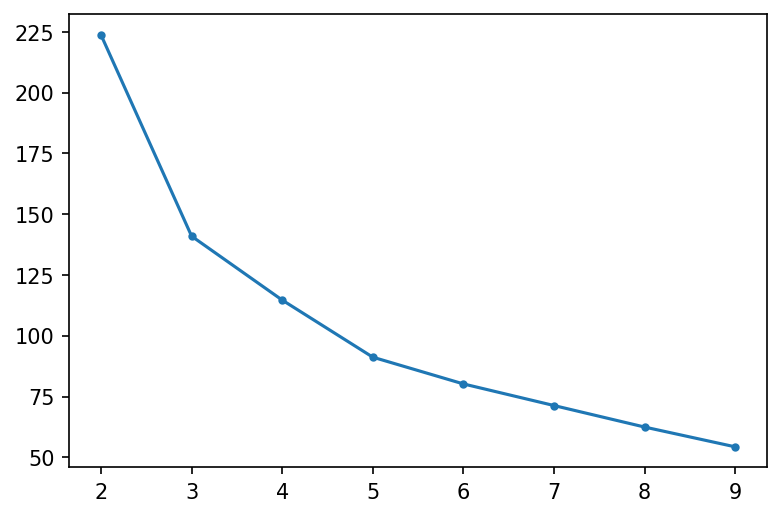

In [22]:
x = range(2,10)
inertias = [KMeans(n_clusters=k, random_state=0).fit(df).inertia_ for k in x]
plt.figure(dpi = 150)
plt.plot(x, inertias,'.-');

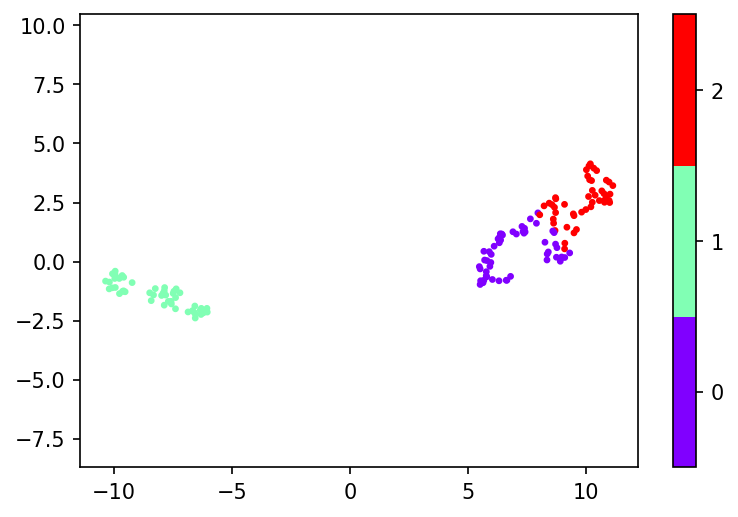

In [23]:
k3_labels = KMeans(n_clusters=3, random_state=0).fit(df).labels_
plot_reduced_data(umap_embedding, k3_labels)

But how to measure quality of the clustering if we have a label to compare to?

In [24]:
from sklearn.metrics import adjusted_rand_score

In [25]:
adjusted_rand_score(species,k3_labels)

0.6201351808870379

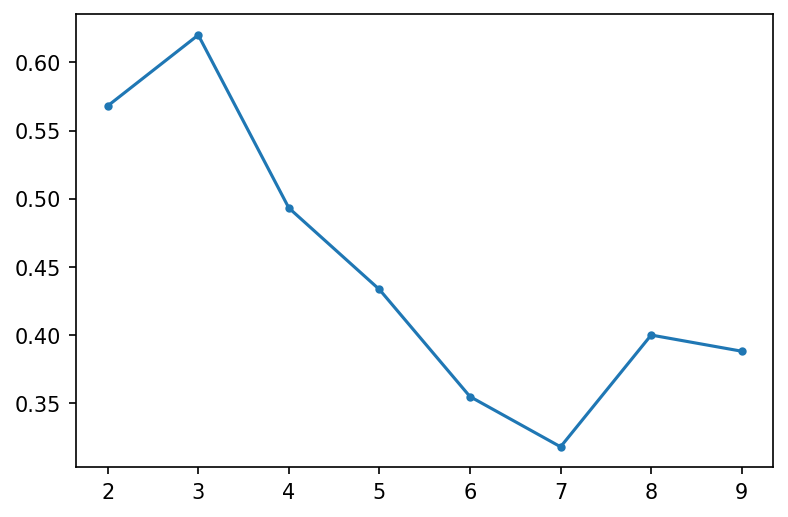

In [26]:
amis = [adjusted_rand_score(species,KMeans(n_clusters=k, random_state=0).fit(df).labels_) for k in x]
plt.figure(dpi = 150)
plt.plot(x,amis,'.-');

## Homework (5 pts)

A) Use 2 other dimensionality reduction techniques (other than PCA nad UMAP) on the digits dataset (2 pts)

B) Use 2 other dimensionality reduction techniques (other than PCA nad UMAP) on the other dataset than digits (2 pts)

C) Use 1 other clustering technique on Iris dataset plot the results with UMAP as above (1 pt)

Please prepare the code in Jupyter notebook and send the notebook to lkrain@sgh.waw.pl with output of the execution.

## A) Use 2 other dimensionality reduction techniques (other than PCA nad UMAP) on the digits dataset (2 pts)
### t-distributed Stochastic Neighbour Embedding (t-SNE)

In [134]:
from sklearn.manifold import TSNE

In [135]:
model = TSNE(n_components=2,random_state=42)
tsne_data = model.fit_transform(digits.data)
print(tsne_data.shape)

(1797, 2)


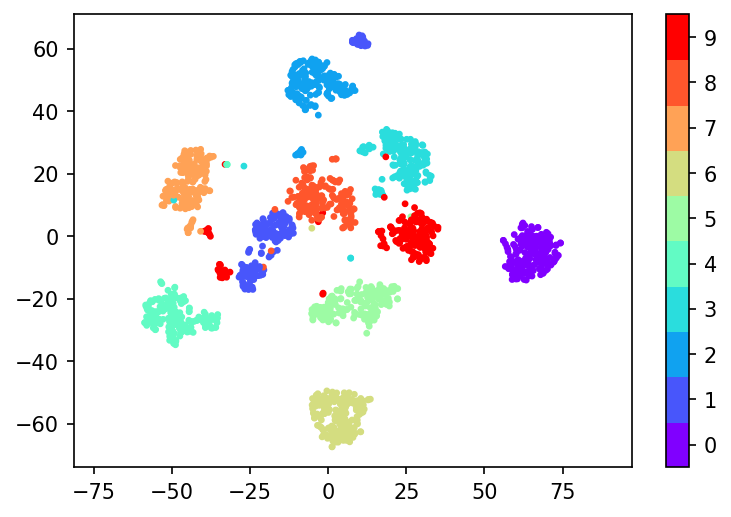

In [136]:
plot_reduced_data(tsne_data, digits.target)

### Independent Component Analysis

In [137]:
from sklearn.decomposition import FastICA 
ICA = FastICA(n_components=2, random_state=42) 
X=ICA.fit_transform(digits.data)
print(X.shape)

(1797, 2)


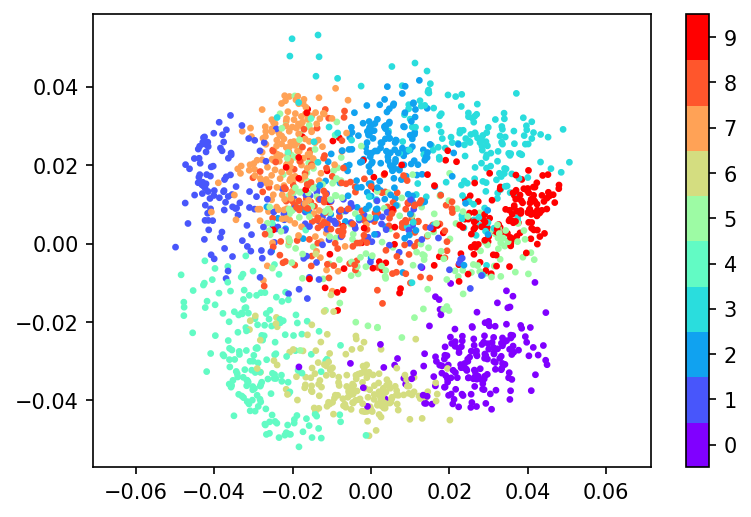

In [138]:
plot_reduced_data(X, digits.target)

## B) Use 2 other dimensionality reduction techniques (other than PCA nad UMAP) on the other dataset than digits (2 pts)

In [139]:
from sklearn.datasets import load_wine
wine = load_wine()

In [140]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [141]:
print(wine.data.shape)

(178, 13)


### ICA

In [142]:
ICA = FastICA(n_components=2, random_state=42) 
X=ICA.fit_transform(wine.data)
print(X.shape)

(178, 2)


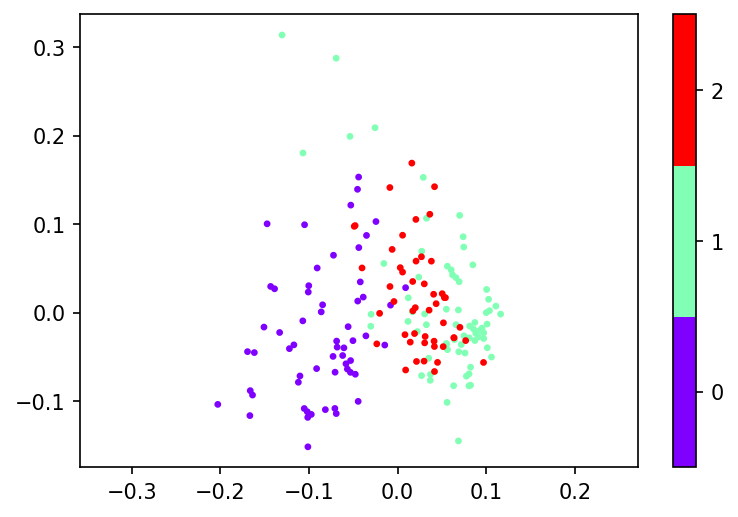

In [143]:
plot_reduced_data(X, wine.target)

### LDA

In [144]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
lda_df = lda.fit(wine.data, wine.target).transform(wine.data)

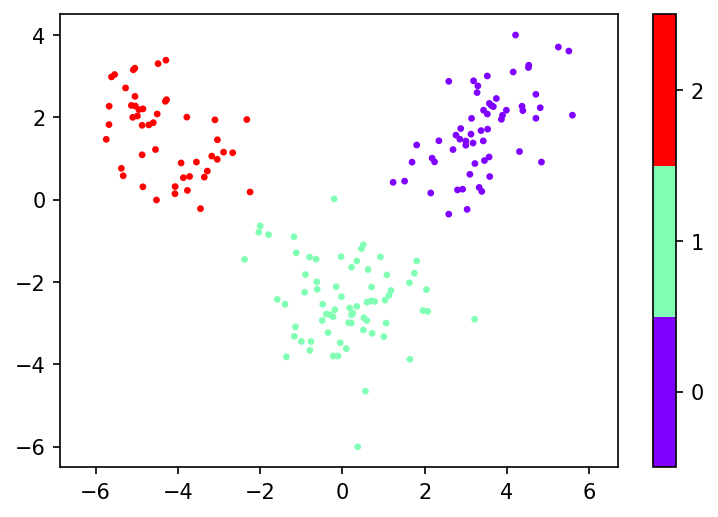

In [145]:
plot_reduced_data(lda_df, wine.target)

## C) Use 1 other clustering technique on Iris dataset plot the results with UMAP as above (1 pt)

## Gaussian Mixture Model (GMM) Clustering

In [146]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, random_state=0).fit(df)
pred_gmm = gmm.predict(df)
pred_gmm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

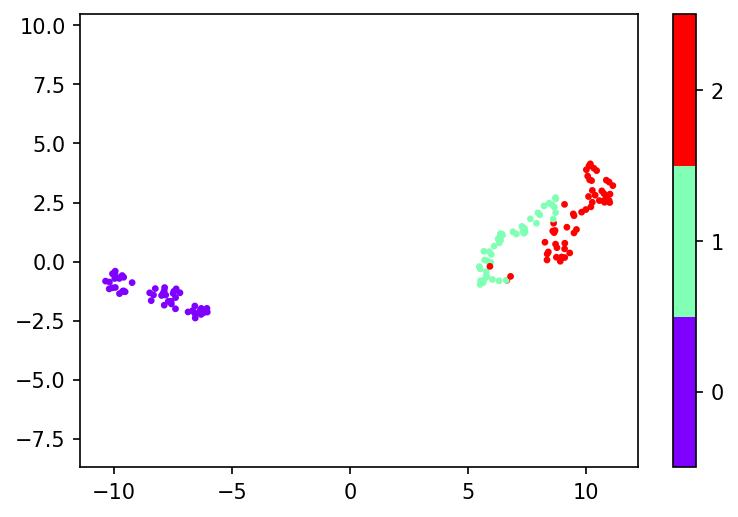

In [147]:
plot_reduced_data(umap_embedding, pred_gmm)